In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('final_data.csv')

In [5]:
df.head()

,company_name,location,job_title,job_description,rating,employer_estimate,min_salary,max_salary,avg_salary,Size,Founded,Type,Industry,Sector,Revenue,skills,age,seniority,job_simp
0,Procter & Gamble,Mumbai,senior manager – sap security governance risk ...,The Senior Manager’s role will ensure that the...,4.1,0,400000,700000,550000.0,10000+ Employees,1837,Company - Public,Consumer Product Manufacturing,Manufacturing,$10+ billion (USD),"SAP, SOX, Analysis skills, SAP S/4HANA, RMF",187.0,2.0,manager
1,S&P Global,Gurgaon,apprentice – data analyst,We are responsible for assuring that data impa...,4.1,0,500000,700000,600000.0,10000+ Employees,1860,Company - Public,Research and development,Management and consulting,$10+ billion (USD),"Business intelligence, Relational databases, ...",164.0,0.0,analyst
2,Oracuz Infotech Pvt Ltd,Remote,data science intern,You will be assigned with module projects and ...,NaN,1,5000,5000,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,"Web development, Machine learning, Data science",NaN,0.0,data scientist
3,Optum,Bengaluru,manager data scientist,"As an Associate Manager, you will play a criti...",NaN,0,1000000,1000000,1000000.0,NaN,NaN,NaN,NaN,NaN,NaN,"TensorFlow, Big data, SQL, Analysis skills, M...",NaN,2.0,manager data scientist
4,ITI Data,Chennai,aws glue data engineer,Require Financial Services industry experience...,4.2,0,200000,900000,550000.0,201 to 500 Employees,1999,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,"Oracle, XML, Spark, NoSQL, MongoDB",25.0,1.0,data engineer


## Preprocessing

In [7]:
df.drop(columns = ['job_title', 'min_salary', 'max_salary'], inplace = True)

In [8]:
df.rename(columns = {'age':'age_of_company', 'job_simp':'job_role'}, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       374 non-null    object 
 1   location           374 non-null    object 
 2   job_description    374 non-null    object 
 3   rating             321 non-null    float64
 4   employer_estimate  374 non-null    int64  
 5   avg_salary         374 non-null    float64
 6   Size               323 non-null    object 
 7   Founded            323 non-null    object 
 8   Type               323 non-null    object 
 9   Industry           323 non-null    object 
 10  Sector             323 non-null    object 
 11  Revenue            323 non-null    object 
 12  skills             373 non-null    object 
 13  age_of_company     268 non-null    float64
 14  seniority          374 non-null    float64
 15  job_role           374 non-null    object 
dtypes: float64(4), int64(1), o

In [10]:
df = df[['job_description','Industry','skills','seniority','job_role']]

In [11]:
df

,job_description,Industry,skills,seniority,job_role
0,The Senior Manager’s role will ensure that the...,Consumer Product Manufacturing,"SAP, SOX, Analysis skills, SAP S/4HANA, RMF",2.0,manager
1,We are responsible for assuring that data impa...,Research and development,"Business intelligence, Relational databases, ...",0.0,analyst
2,You will be assigned with module projects and ...,NaN,"Web development, Machine learning, Data science",0.0,data scientist
3,"As an Associate Manager, you will play a criti...",NaN,"TensorFlow, Big data, SQL, Analysis skills, M...",2.0,manager data scientist
4,Require Financial Services industry experience...,Information Technology Support Services,"Oracle, XML, Spark, NoSQL, MongoDB",1.0,data engineer
...,...,...,...,...,...
369,Have a firm grasp on basic data structures and...,Internet & Web Services,"Machine learning, Distributed systems",0.0,intern
370,Join our team as an experienced data scientist...,--,NaN,1.0,data scientist
371,Experiences you gain in this internship will h...,NaN,"Image processing, Machine learning, Natural l...",0.0,data scientist
372,Job Title : Data Science Intern Created on: 24...,Enterprise Software & Network Solutions,Data science,0.0,data scientist


In [12]:
df.isnull().sum()

job_description     0
Industry           51
skills              1
seniority           0
job_role            0
dtype: int64

In [13]:
pd.crosstab(df.Industry, df.job_role)

job_role,ai engineer,analyst,cloud related,data architect,data engineer,data related,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other,python automation,software developer
Industry,,,,,,,,,,,,,,,,
--,0,4,0,0,1,0,30,0,3,0,0,0,0,0,0,2
Advertising & Public Relations,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aerospace and defence,0,1,0,1,2,0,2,0,0,0,0,0,0,2,0,5
Banking & Lending,0,2,0,2,3,0,6,0,2,0,1,0,0,0,0,0
Biotech & Pharmaceuticals,0,1,0,4,2,1,2,0,0,0,1,0,1,3,0,6
Business consulting,1,30,2,5,7,0,9,2,0,0,11,2,9,2,0,6
Computer Hardware Development,0,0,0,0,0,0,2,0,0,2,0,0,0,7,0,1
Consumer Product Manufacturing,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,2
Electronics Manufacturing,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [14]:
df.Industry.value_counts()

Industry
Business consulting                        86
--                                         40
Information Technology Support Services    36
Biotech & Pharmaceuticals                  21
Banking & Lending                          16
Research and development                   14
Financial Transaction Processing           13
Aerospace and defence                      13
Computer Hardware Development              12
Enterprise Software & Network Solutions    10
Software Development                        8
Energy & Utilities                          7
Internet & Web Services                     6
Gambling & Betting                          5
Consumer Product Manufacturing              5
Electronics Manufacturing                   4
Machinery Manufacturing                     4
Travel Agencies                             4
Telecommunications Services                 4
HR Consulting                               4
Investment & Asset Management               4
Healthcare Services & Hos

In [15]:
## abhi k liye let's keep industry aside

In [16]:
df = df[['job_description','skills','seniority','job_role']]

In [17]:
df['seniority']

0      2.0
1      0.0
2      0.0
3      2.0
4      1.0
      ... 
369    0.0
370    1.0
371    0.0
372    0.0
373    1.0
Name: seniority, Length: 374, dtype: float64

In [18]:
df.isnull().sum()

job_description    0
skills             1
seniority          0
job_role           0
dtype: int64

In [19]:
df.dropna(inplace = True)

C:\Users\urvas\AppData\Local\Temp\ipykernel_52008\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 373
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_description  373 non-null    object 
 1   skills           373 non-null    object 
 2   seniority        373 non-null    float64
 3   job_role         373 non-null    object 
dtypes: float64(1), object(3)
memory usage: 14.6+ KB


In [21]:
df.job_description

0      The Senior Manager’s role will ensure that the...
1      We are responsible for assuring that data impa...
2      You will be assigned with module projects and ...
3      As an Associate Manager, you will play a criti...
4      Require Financial Services industry experience...
                             ...                        
368    Design, run and analyze A/B and multivariate h...
369    Have a firm grasp on basic data structures and...
371    Experiences you gain in this internship will h...
372    Job Title : Data Science Intern Created on: 24...
373    Collaborate with data scientists and analysts ...
Name: job_description, Length: 373, dtype: object

In [22]:
df.job_description[0].split()

['The',
 'Senior',
 'Manager’s',
 'role',
 'will',
 'ensure',
 'that',
 'the',
 'SAP',
 'Security',
 'Strategy',
 'and',
 'Risk',
 'and',
 'Compliance',
 'Management',
 'frameworks',
 'are',
 'always',
 'up-to-date,',
 'new',
 'threats',
 'are……',
 'Skills:',
 'SAP,',
 'SOX,',
 'Analysis',
 'skills,',
 'SAP',
 'S/4HANA,',
 'RMF']

In [23]:
df.skills

0            SAP, SOX, Analysis skills, SAP S/4HANA, RMF
1       Business intelligence, Relational databases, ...
2        Web development, Machine learning, Data science
3       TensorFlow, Big data, SQL, Analysis skills, M...
4                     Oracle, XML, Spark, NoSQL, MongoDB
                             ...                        
368     TensorFlow, Statistics, Big data, Software de...
369                Machine learning, Distributed systems
371     Image processing, Machine learning, Natural l...
372                                         Data science
373     Power BI, Microsoft Excel, Salesforce, Applic...
Name: skills, Length: 373, dtype: object

In [24]:
df.reset_index(inplace = True)

In [25]:
# removing skills from job description which came attached
for i in range(len(df.job_description)):
    df.loc[i,'job_description'] = df.job_description[i].split("\n")[0]

In [26]:
df.job_description[0]

'The Senior Manager’s role will ensure that the SAP Security Strategy and Risk and Compliance Management frameworks are always up-to-date, new threats are……\r'

In [27]:
import re
def lower_remove_trailing_dots(text):
    text = text.lower()
    return re.sub(r'\s*\.*\s*$|[.…]+\s*$', '', text)

df.loc[:,'job_description'] = df.job_description.apply(lower_remove_trailing_dots)

In [28]:
df.job_description[0]

'the senior manager’s role will ensure that the sap security strategy and risk and compliance management frameworks are always up-to-date, new threats are'

In [29]:
def remove_punctuation(text):
    import string
    withoutpunc = [x for x in text if x not in string.punctuation]
    return ''.join(withoutpunc)

In [30]:
df.loc[:,'job_description'] = df.job_description.apply(remove_punctuation)

In [31]:
df.skills[0]

' SAP, SOX, Analysis skills, SAP S/4HANA, RMF'

In [32]:
df.loc[:,'skills'] = df.skills.apply(lower_remove_trailing_dots)
df.loc[:,'skills'] = df.skills.apply(remove_punctuation)
df.loc[:,'skills'] = df.skills.apply(lambda x : x.strip())

In [33]:
df['combined_text'] = df['skills'] + ' ' + df['job_description']

C:\Users\urvas\AppData\Local\Temp\ipykernel_52008\4150794359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_text'] = df['skills'] + ' ' + df['job_description']


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['job_role_encoded'] = le.fit_transform(df['job_role'])

C:\Users\urvas\AppData\Local\Temp\ipykernel_52008\23171497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_role_encoded'] = le.fit_transform(df['job_role'])


## Train-Test split

In [36]:
x = df[['combined_text','seniority']]
y = df['job_role_encoded']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state = 42, test_size = 0.2)

## Transformation

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
bow_train = vec.fit_transform(xtrain['combined_text'])
bow_test = vec.transform(xtest['combined_text'])
vec.get_feature_names_out()

array(['13', '14', '19', ..., 'you', 'youll', 'your'], dtype=object)

In [39]:
for i in df['combined_text']:
    print(i)

sap sox analysis skills sap s4hana rmf the senior manager’s role will ensure that the sap security strategy and risk and compliance management frameworks are always uptodate new threats are
business intelligence relational databases tableau databases sql we are responsible for assuring that data impacts are evaluate understood and communicated across all teams so that business continuity is maintained
web development machine learning data science you will be assigned with module projects and tasks during the internship and on the basis of performance and availability of vacancies you will be hired
tensorflow big data sql analysis skills machine learning as an associate manager you will play a critical role in driving the success of our data science projects leading a team of data scientists and delivering
oracle xml spark nosql mongodb require financial services industry experience this is a high visibility fastpaced key initiative will integrate data across internal and external sourc

In [40]:
for i in vec.get_feature_names_out():
    print(i)

13
14
19
20000
24042023
34
35
4444
ab
abilities
ability
about
accelerate
acceptance
access
accessibility
accessible
accommodate
accommodation
accommodations
accommodationsadobecom
according
accountable
accredited
accuracy
acquire
acquired
across
acting
actionable
active
activities
added
adding
addition
additionally
address
adhere
administering
administration
administrative
adobe
adopt
advanced
advancements
advantage
adwords
aerospace
agile
ahmedabad
ai
aidriven
aillm
aimed
ajax
aladdin
algorithms
align
aligned
alignment
all
along
also
alternatively
alteryx
although
ambitious
an
analysis
analyst
analysts
analytic
analytical
analytics
analyze
analyzing
and
andor
android
angular
anomalies
any
anz
apache
api
apis
applicability
application
applications
apply
applying
approaches
approves
arcgis
architect
architects
architectural
architecture
architectures
are
area
arrangements
array
artifical
artificial
as
ascertain
asking
aspect
aspects
aspnet
assembles
asset
assets
assigned
assignments
ass

In [41]:
(df['skills'] + ' ' + df['job_description'])[0]

'sap sox analysis skills sap s4hana rmf the senior manager’s role will ensure that the sap security strategy and risk and compliance management frameworks are always uptodate new threats are'

In [42]:
vec.get_feature_names_out().shape

(1219,)

In [43]:
# bow_df = pd.DataFrame(bow.toarray(), columns=vec.get_feature_names_out())
# bow_df['seniority'] = df['seniority'].values

`Encoding target column`

In [47]:
bow_train.toarray()

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
xtrain['seniority']

192    0.0
75     1.0
84     1.0
361    1.0
16     0.0
      ... 
71     1.0
106    0.0
270    2.0
348    2.0
102    1.0
Name: seniority, Length: 298, dtype: float64

## Text Classification Model

### classification only with bow features

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=30, random_state=42)
clf.fit(bow_train, ytrain)

# Predictions
ypred = clf.predict(bow_test)

# Evaluate the model
print("Accuracy:", accuracy_score(ytest,ypred))
print(classification_report(ytest, ypred, target_names=le.classes_, labels = np.unique(ytest)))


Accuracy: 0.76
                           precision    recall  f1-score   support

              ai engineer       0.75      0.92      0.83        13
                  analyst       1.00      1.00      1.00         2
            cloud related       0.80      0.67      0.73         6
           data architect       0.70      1.00      0.83        26
            data engineer       0.00      0.00      0.00         1
             data related       1.00      0.20      0.33         5
           data scientist       1.00      1.00      1.00         1
                 director       0.00      0.00      0.00         1
                   intern       1.00      0.50      0.67         2
machine learning engineer       1.00      0.75      0.86         4
                  manager       1.00      0.50      0.67         2
   manager data scientist       0.00      0.00      0.00         1
             nlp engineer       0.75      0.55      0.63        11

                 accuracy                    

D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 13, does not match size of target_names, 16
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [52]:
# Get unique encoded labels present in test and predictions
unique_labels = np.unique(np.concatenate([ytest, ypred]))

# Compute confusion matrix with correctly matched labels
cm = confusion_matrix(ytest, ypred, labels=unique_labels)

# Convert confusion matrix to DataFrame with category names
conf_mat = pd.DataFrame(cm, 
                        columns=le.inverse_transform(unique_labels), 
                        index=le.inverse_transform(unique_labels))

conf_mat

,analyst,data architect,data engineer,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other,python automation,software developer
analyst,12,0,0,1,0,0,0,0,0,0,0,0,0
data architect,0,2,0,0,0,0,0,0,0,0,0,0,0
data engineer,0,0,4,2,0,0,0,0,0,0,0,0,0
data scientist,0,0,0,26,0,0,0,0,0,0,0,0,0
director,0,0,0,0,0,0,0,0,0,0,0,0,1
intern,2,0,0,2,0,1,0,0,0,0,0,0,0
machine learning engineer,0,0,0,0,0,0,1,0,0,0,0,0,0
manager,1,0,0,0,0,0,0,0,0,0,0,0,0
manager data scientist,0,0,0,1,0,0,0,0,1,0,0,0,0
nlp engineer,0,0,0,1,0,0,0,0,0,3,0,0,0


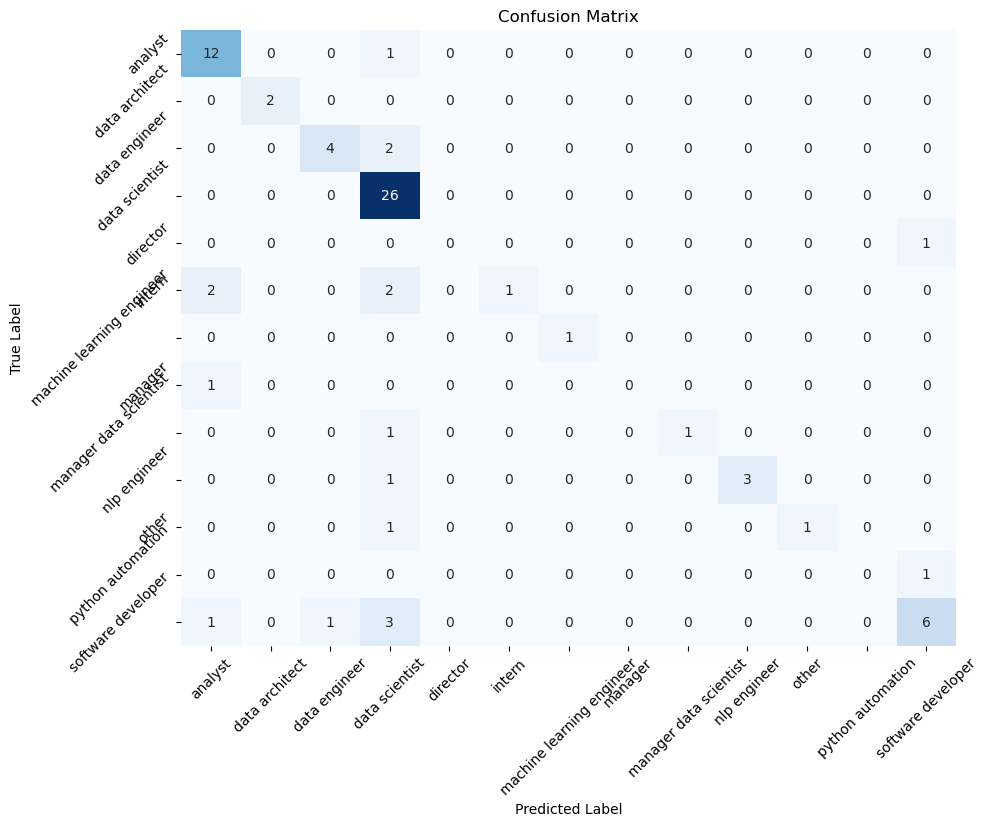

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [54]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
sw_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
xtrain

,combined_text,seniority
192,project management machine learning risk manag...,0.0
75,machine learning data science work with stakeh...,1.0
84,azure cloud architecture pci kubernetes big da...,1.0
361,azure data analysis skills nosql sql aws as a ...,1.0
16,statistics microsoft excel data mining r sql a...,0.0
...,...,...
71,data analysis skills english ai communication ...,1.0
106,microsoft office data entry clerical experienc...,0.0
270,ajax performance tuning azure oracle clinical ...,2.0
348,spark project management data science we are s...,2.0


### classification with bow features and seniority combined

In [57]:
def combine_embedded_with_numeric(bow_train, bow_test, xtrain, xtest):
    #Convert BoW to Dense Format
    bow_train_dense = bow_train.toarray()
    bow_test_dense = bow_test.toarray()
    
    #Extract Numerical Features as a NumPy Array
    seniority_train = xtrain['seniority'].values.reshape(-1,1)
    seniority_test = xtest['seniority'].values.reshape(-1,1)
    
    #Concatenate BoW and Numerical Features
    xtrain_combined = np.hstack((bow_train_dense, seniority_train))
    xtest_combined = np.hstack((bow_test_dense, seniority_test))

    return (xtrain_combined, xtest_combined)

In [58]:
xtrain_combined , xtest_combined = combine_embedded_with_numeric(bow_train, bow_test, xtrain, xtest)

In [59]:
clf2 = RandomForestClassifier()
clf2.fit(xtrain_combined, ytrain)

ypred2 = clf2.predict(xtest_combined)

print("Accuracy: ",accuracy_score(ytest, ypred2))
print(classification_report(ytest, ypred2, target_names = le.classes_, labels = np.unique(ytest)))

Accuracy:  0.76
                           precision    recall  f1-score   support

              ai engineer       0.80      0.92      0.86        13
                  analyst       1.00      1.00      1.00         2
            cloud related       0.80      0.67      0.73         6
           data architect       0.68      1.00      0.81        26
            data engineer       0.00      0.00      0.00         1
             data related       1.00      0.20      0.33         5
           data scientist       1.00      1.00      1.00         1
                 director       0.00      0.00      0.00         1
                   intern       1.00      0.50      0.67         2
machine learning engineer       1.00      0.75      0.86         4
                  manager       0.50      0.50      0.50         2
   manager data scientist       0.00      0.00      0.00         1
             nlp engineer       0.86      0.55      0.67        11

                 accuracy                   

D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 13, does not match size of target_names, 16
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [60]:
def get_confusion_matrix(ytest, ypred):
    import matplotlib.pyplot as plt
    from sklearn.metrics import ConfusionMatrixDisplay

    # Get unique encoded labels present in test and predictions
    unique_labels = np.unique(np.concatenate([ytest, ypred]))
    
    # Compute confusion matrix with correctly matched labels
    cm = confusion_matrix(ytest, ypred, labels=unique_labels)
    
    # Convert confusion matrix to DataFrame with category names
    conf_mat = pd.DataFrame(cm, 
                            columns=le.inverse_transform(unique_labels), 
                            index=le.inverse_transform(unique_labels))

    plt.figure(figsize=(20,10))
    ConfusionMatrixDisplay(cm, display_labels=le.inverse_transform(unique_labels)).plot(xticks_rotation=45)
    return conf_mat



,analyst,data architect,data engineer,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other,python automation,software developer
analyst,12,0,0,1,0,0,0,0,0,0,0,0,0
data architect,0,2,0,0,0,0,0,0,0,0,0,0,0
data engineer,0,0,4,2,0,0,0,0,0,0,0,0,0
data scientist,0,0,0,26,0,0,0,0,0,0,0,0,0
director,0,0,0,0,0,0,0,0,0,0,0,0,1
intern,0,0,0,4,0,1,0,0,0,0,0,0,0
machine learning engineer,0,0,0,0,0,0,1,0,0,0,0,0,0
manager,1,0,0,0,0,0,0,0,0,0,0,0,0
manager data scientist,0,0,0,1,0,0,0,0,1,0,0,0,0
nlp engineer,1,0,0,0,0,0,0,0,0,3,0,0,0


<Figure size 2000x1000 with 0 Axes>

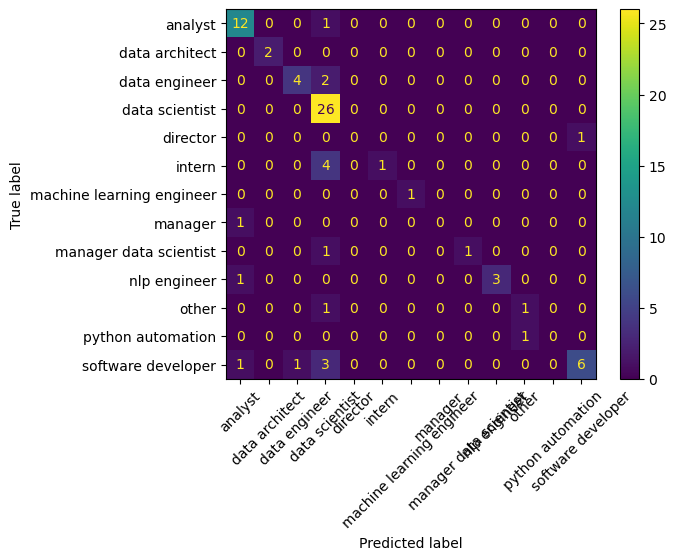

In [61]:
get_confusion_matrix(ytest, ypred2)

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_combined, ytrain)
pred_naive = gnb.predict(xtest_combined)
accuracy_score(ytest, pred_naive)

0.7733333333333333

In [63]:
print(classification_report(ytest, pred_naive, target_names = le.classes_, labels = np.unique(ytest)))

                           precision    recall  f1-score   support

              ai engineer       0.87      1.00      0.93        13
                  analyst       1.00      1.00      1.00         2
            cloud related       1.00      0.67      0.80         6
           data architect       0.70      1.00      0.83        26
            data engineer       0.00      0.00      0.00         1
             data related       1.00      0.20      0.33         5
           data scientist       1.00      1.00      1.00         1
                 director       0.00      0.00      0.00         1
                   intern       1.00      0.50      0.67         2
machine learning engineer       1.00      0.75      0.86         4
                  manager       1.00      0.50      0.67         2
   manager data scientist       0.00      0.00      0.00         1
             nlp engineer       0.67      0.55      0.60        11

                 accuracy                           0.77    

D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 13, does not match size of target_names, 16
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

,analyst,data architect,data engineer,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other,python automation,software developer
analyst,13,0,0,0,0,0,0,0,0,0,0,0,0
data architect,0,2,0,0,0,0,0,0,0,0,0,0,0
data engineer,0,0,4,2,0,0,0,0,0,0,0,0,0
data scientist,0,0,0,26,0,0,0,0,0,0,0,0,0
director,0,0,0,0,0,0,0,1,0,0,0,0,0
intern,0,0,0,4,0,1,0,0,0,0,0,0,0
machine learning engineer,0,0,0,0,0,0,1,0,0,0,0,0,0
manager,0,0,0,0,0,0,0,0,0,0,0,0,1
manager data scientist,0,0,0,1,0,0,0,0,1,0,0,0,0
nlp engineer,1,0,0,0,0,0,0,0,0,3,0,0,0


<Figure size 2000x1000 with 0 Axes>

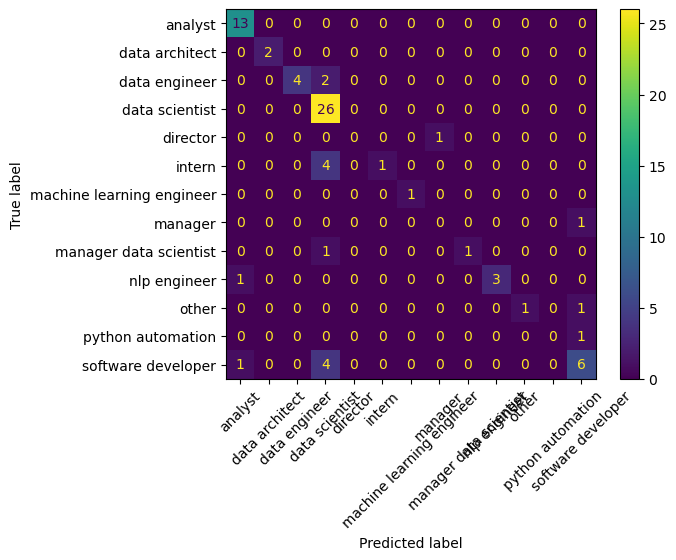

In [64]:
get_confusion_matrix(ytest, pred_naive)

Observations - 
- both naive bayes and random forest are almost similar in performance for the data
- we got better accuracy after combining the seniority column with the feature columns  

### fitting model after removing stop words

In [67]:
cv2 = CountVectorizer(stop_words='english')
xtrain_sw_removed = cv2.fit_transform(xtrain['combined_text'])
xtest_sw_removed = cv2.transform(xtest['combined_text'])


In [68]:
xtrain_combined_sw , xtest_combined_sw = combine_embedded_with_numeric(xtrain_sw_removed, xtest_sw_removed, xtrain, xtest)

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_combined_sw, ytrain)
pred_naive = gnb.predict(xtest_combined_sw)
accuracy_score(ytest, pred_naive)

0.7733333333333333

,analyst,data architect,data engineer,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other,python automation,software developer
analyst,13,0,0,0,0,0,0,0,0,0,0,0,0
data architect,0,2,0,0,0,0,0,0,0,0,0,0,0
data engineer,0,0,4,2,0,0,0,0,0,0,0,0,0
data scientist,0,0,0,26,0,0,0,0,0,0,0,0,0
director,0,0,0,0,0,0,0,1,0,0,0,0,0
intern,0,0,0,4,0,1,0,0,0,0,0,0,0
machine learning engineer,0,0,0,0,0,0,1,0,0,0,0,0,0
manager,0,0,0,0,0,0,0,0,0,0,0,0,1
manager data scientist,0,0,0,1,0,0,0,0,1,0,0,0,0
nlp engineer,1,0,0,0,0,0,0,0,0,3,0,0,0


<Figure size 2000x1000 with 0 Axes>

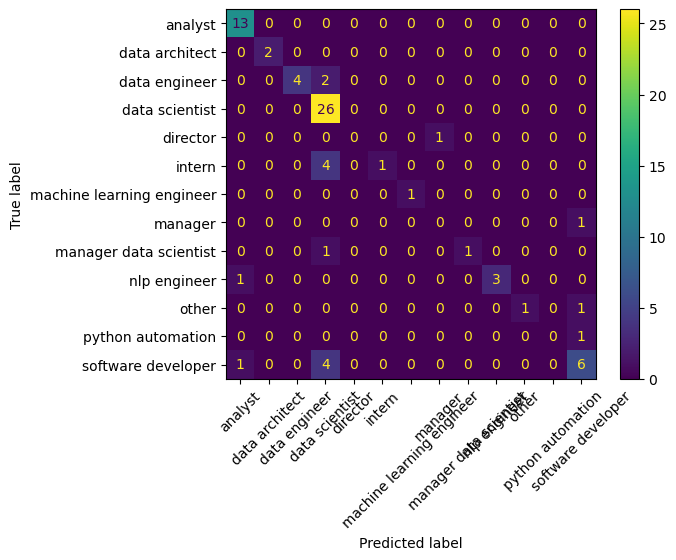

In [70]:
get_confusion_matrix(ytest, pred_naive)

In [71]:
clf2 = RandomForestClassifier()
clf2.fit(xtrain_combined_sw, ytrain)

ypred2 = clf2.predict(xtest_combined_sw)

print("Accuracy: ",accuracy_score(ytest, ypred2))
print(classification_report(ytest, ypred2, target_names = le.classes_, labels = np.unique(ytest)))

Accuracy:  0.76
                           precision    recall  f1-score   support

              ai engineer       0.92      0.92      0.92        13
                  analyst       1.00      1.00      1.00         2
            cloud related       0.80      0.67      0.73         6
           data architect       0.65      1.00      0.79        26
            data engineer       0.00      0.00      0.00         1
             data related       1.00      0.20      0.33         5
           data scientist       1.00      1.00      1.00         1
                 director       0.00      0.00      0.00         1
                   intern       1.00      0.50      0.67         2
machine learning engineer       1.00      0.75      0.86         4
                  manager       1.00      0.50      0.67         2
   manager data scientist       0.00      0.00      0.00         1
             nlp engineer       0.75      0.55      0.63        11

                 accuracy                   

D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 13, does not match size of target_names, 16
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

,analyst,data architect,data engineer,data scientist,director,intern,machine learning engineer,manager,manager data scientist,nlp engineer,other,python automation,software developer
analyst,12,0,0,1,0,0,0,0,0,0,0,0,0
data architect,0,2,0,0,0,0,0,0,0,0,0,0,0
data engineer,0,0,4,2,0,0,0,0,0,0,0,0,0
data scientist,0,0,0,26,0,0,0,0,0,0,0,0,0
director,0,0,0,0,0,0,0,0,0,0,0,0,1
intern,0,0,0,4,0,1,0,0,0,0,0,0,0
machine learning engineer,0,0,0,0,0,0,1,0,0,0,0,0,0
manager,1,0,0,0,0,0,0,0,0,0,0,0,0
manager data scientist,0,0,0,1,0,0,0,0,1,0,0,0,0
nlp engineer,0,0,0,1,0,0,0,0,0,3,0,0,0


<Figure size 2000x1000 with 0 Axes>

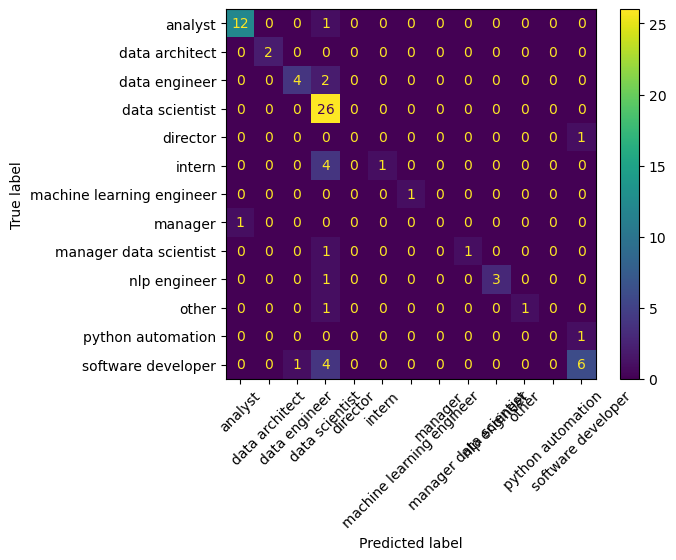

In [72]:
get_confusion_matrix(ytest, ypred2)

### taking class imbalance into account

In [114]:
df['job_role'].value_counts()

job_role
data scientist               117
analyst                       81
software developer            39
data engineer                 28
other                         22
manager                       20
ai engineer                   17
data architect                17
intern                        13
machine learning engineer     13
cloud related                  3
data related                   3
Name: count, dtype: int64

In [112]:
df['job_role'] = df['job_role'].replace('manager data scientist', 'data scientist')
df['job_role'] = df['job_role'].replace('python automation','other')
df['job_role'] = df['job_role'].replace('director','manager')
df['job_role'] = df['job_role'].replace('nlp engineer','ai engineer')


C:\Users\urvas\AppData\Local\Temp\ipykernel_52008\1417005011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_role'] = df['job_role'].replace('manager data scientist', 'data scientist')
C:\Users\urvas\AppData\Local\Temp\ipykernel_52008\1417005011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_role'] = df['job_role'].replace('python automation','other')
C:\Users\urvas\AppData\Local\Temp\ipykernel_52008\1417005011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [118]:
le2 = LabelEncoder()
df['job_role_encoded2'] = le2.fit_transform(df['job_role'])

C:\Users\urvas\AppData\Local\Temp\ipykernel_52008\3896821772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_role_encoded2'] = le2.fit_transform(df['job_role'])


In [120]:
x = df[['combined_text','seniority']]
y = df['job_role_encoded2']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state = 42, test_size = 0.2)

In [122]:
#from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer()
bow_train2 = vec2.fit_transform(xtrain['combined_text'])
bow_test2 = vec2.transform(xtest['combined_text'])
vec2.get_feature_names_out()

array(['13', '14', '19', ..., 'you', 'youll', 'your'], dtype=object)

In [126]:
(xtrain_combined, xtest_combined) = combine_embedded_with_numeric(bow_train2, bow_test2, xtrain, xtest)

In [128]:
xtrain_combined

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [130]:
# accounting for class weights
clf2 = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
clf2.fit(xtrain_combined, ytrain)

ypred2 = clf2.predict(xtest_combined)

print("Accuracy: ",accuracy_score(ytest, ypred2))
print(classification_report(ytest, ypred2, target_names = le.classes_, labels = np.unique(ytest)))

Accuracy:  0.7733333333333333
                           precision    recall  f1-score   support

              ai engineer       1.00      0.75      0.86         4
                  analyst       0.80      0.92      0.86        13
            cloud related       1.00      1.00      1.00         2
           data architect       0.80      0.67      0.73         6
            data engineer       0.72      1.00      0.84        28
             data related       1.00      0.20      0.33         5
           data scientist       1.00      1.00      1.00         1
                 director       0.00      0.00      0.00         2
                   intern       0.50      0.33      0.40         3
machine learning engineer       0.86      0.55      0.67        11

                 accuracy                           0.77        75
                macro avg       0.77      0.64      0.67        75
             weighted avg       0.78      0.77      0.74        75



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 10, does not match size of target_names, 16
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [132]:
# manual class weight calculation

from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(ytrain)

class_weights = compute_class_weight('balanced', classes=classes, y = ytrain)
class_weights_dict = dict(zip(classes, class_weights))
class_weights_dict

{0: 1.9102564102564104,
 1: 0.36519607843137253,
 2: 8.277777777777779,
 3: 1.6555555555555554,
 4: 1.128787878787879,
 5: 8.277777777777779,
 6: 0.27902621722846443,
 7: 3.1041666666666665,
 8: 2.0694444444444446,
 9: 1.3796296296296295,
 10: 1.3070175438596492,
 11: 0.8869047619047619}

In [134]:
clf = RandomForestClassifier(n_estimators=30, random_state=42, class_weight=class_weights_dict)
clf.fit(xtrain_combined, ytrain)
ypred2 = clf2.predict(xtest_combined)

print("Accuracy: ",accuracy_score(ytest, ypred2))
print(classification_report(ytest, ypred2, target_names = le.classes_, labels = np.unique(ytest)))

Accuracy:  0.7733333333333333
                           precision    recall  f1-score   support

              ai engineer       1.00      0.75      0.86         4
                  analyst       0.80      0.92      0.86        13
            cloud related       1.00      1.00      1.00         2
           data architect       0.80      0.67      0.73         6
            data engineer       0.72      1.00      0.84        28
             data related       1.00      0.20      0.33         5
           data scientist       1.00      1.00      1.00         1
                 director       0.00      0.00      0.00         2
                   intern       0.50      0.33      0.40         3
machine learning engineer       0.86      0.55      0.67        11

                 accuracy                           0.77        75
                macro avg       0.77      0.64      0.67        75
             weighted avg       0.78      0.77      0.74        75



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 10, does not match size of target_names, 16
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

- Trying Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(xtrain_combined, ytrain)
pred_log = logistic.predict(xtest_combined)
print(accuracy_score(ytest, pred_log))
print(classification_report(ytest, pred_log, target_names = le.classes_, labels = np.unique(ytest)))

0.76
                           precision    recall  f1-score   support

              ai engineer       1.00      0.75      0.86         4
                  analyst       0.92      0.92      0.92        13
            cloud related       1.00      1.00      1.00         2
           data architect       0.67      0.67      0.67         6
            data engineer       0.76      0.93      0.84        28
             data related       0.33      0.20      0.25         5
           data scientist       1.00      1.00      1.00         1
                 director       0.00      0.00      0.00         2
                   intern       0.50      0.33      0.40         3
machine learning engineer       0.70      0.64      0.67        11

                 accuracy                           0.76        75
                macro avg       0.69      0.64      0.66        75
             weighted avg       0.74      0.76      0.74        75



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 10, does not match size of target_names, 16
  warnings.warn(


In [139]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc = balanced_accuracy_score(ytest, ypred2)
balanced_acc

0.6418531468531468

In [141]:
balanced_accuracy_score(ytest, pred_log)

0.6438011988011987

#### Naive performing best uptil now - 80%

In [145]:
#from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_combined, ytrain)
pred_naive = gnb.predict(xtest_combined)
accuracy_score(ytest, pred_naive)

0.8

In [160]:
balanced_accuracy_score(ytest, pred_naive)

0.6995454545454546

In [150]:
cv2 = CountVectorizer(stop_words='english')
xtrain_sw_removed = cv2.fit_transform(xtrain['combined_text'])
xtest_sw_removed = cv2.transform(xtest['combined_text'])

xtrain_sw_combined, xtest_sw_combined = combine_embedded_with_numeric(bow_train2, bow_test2, xtrain, xtest)

In [154]:
gnb2 = GaussianNB()
gnb2.fit(xtrain_sw_combined, ytrain)
pred_naive2 = gnb2.predict(xtest_sw_combined)
accuracy_score(ytest, pred_naive2)

0.8

In [162]:
ytrain.value_counts()

job_role_encoded2
6     89
1     68
11    28
4     22
10    19
9     18
3     15
0     13
8     12
7      8
2      3
5      3
Name: count, dtype: int64

In [180]:
bow_train2.toarray().shape

(298, 1219)

In [174]:
xtrain_combined.shape

(298, 1220)

In [164]:
# generating synthetic data for the minority classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42, k_neighbors=1)
xsampled , ysampled = smote.fit_resample(xtrain_combined, ytrain)

pd.Series(ysampled).value_counts()

job_role_encoded2
7     89
6     89
3     89
1     89
0     89
11    89
8     89
10    89
4     89
2     89
9     89
5     89
Name: count, dtype: int64

In [182]:
xsampled.shape

(1068, 1220)

In [184]:
gnb_after_smoten = GaussianNB()
gnb_after_smoten.fit(xsampled, ysampled)
pred_naive3 = gnb_after_smoten.predict(xtest_combined)
accuracy_score(ytest, pred_naive3)

0.8

In [188]:
balanced_accuracy_score(ytest, pred_naive3)

0.6995454545454546

,ai engineer,analyst,data architect,data engineer,data scientist,director,intern,machine learning engineer,manager,manager data scientist
ai engineer,3,1,0,0,0,0,0,0,0,0
analyst,0,13,0,0,0,0,0,0,0,0
data architect,0,0,2,0,0,0,0,0,0,0
data engineer,0,0,0,4,2,0,0,0,0,0
data scientist,0,0,0,0,28,0,0,0,0,0
director,0,0,0,0,4,1,0,0,0,0
intern,0,0,0,0,0,0,1,0,0,0
machine learning engineer,0,0,0,0,0,0,0,1,0,1
manager,0,0,0,0,0,0,0,0,1,2
manager data scientist,0,1,0,0,4,0,0,0,0,6


<Figure size 2000x1000 with 0 Axes>

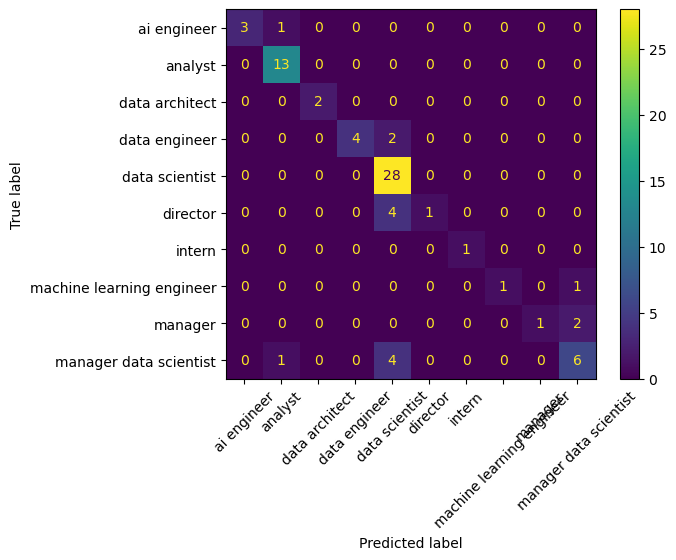

In [190]:
get_confusion_matrix(ytest, pred_naive3)

In [198]:
np.unique(ytest).shape

(10,)

In [202]:
le2.classes_.shape

(12,)

In [204]:
print(classification_report(ytest, pred_naive3, target_names = le2.classes_, labels = np.unique(ytest)))

                           precision    recall  f1-score   support

              ai engineer       1.00      0.75      0.86         4
                  analyst       0.87      1.00      0.93        13
            cloud related       1.00      1.00      1.00         2
           data architect       1.00      0.67      0.80         6
            data engineer       0.74      1.00      0.85        28
             data related       1.00      0.20      0.33         5
           data scientist       1.00      1.00      1.00         1
                   intern       1.00      0.50      0.67         2
machine learning engineer       1.00      0.33      0.50         3
                  manager       0.67      0.55      0.60        11

                 accuracy                           0.80        75
                macro avg       0.93      0.70      0.75        75
             weighted avg       0.83      0.80      0.78        75



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2642: UserWarning: labels size, 10, does not match size of target_names, 12
  warnings.warn(
